In [1]:
import numpy as np
import pandas as pd

In [129]:
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
train = pd.read_csv("flights_train.csv")
test = pd.read_csv("flights_test.csv")
submit_sample = pd.read_csv("submit_sample.csv")

In [122]:
master = pd.read_csv("flights.csv")
master

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
results = master[master.MONTH == 7]
results

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
2889512,2015,7,1,3,NK,298,N624NK,LAS,IAH,3,...,540.0,40.0,0,0,NaN,2.0,0.0,38.0,0.0,0.0
2889513,2015,7,1,3,AA,1965,N507AY,SFO,CLT,5,...,806.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2889514,2015,7,1,3,DL,2020,N3759,LAX,MEM,5,...,604.0,16.0,0,0,NaN,16.0,0.0,0.0,0.0,0.0
2889515,2015,7,1,3,NK,612,N629NK,LAS,MSP,5,...,552.0,49.0,0,0,NaN,35.0,0.0,14.0,0.0,0.0
2889516,2015,7,1,3,UA,1044,N39418,ANC,ORD,8,...,915.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3410225,2015,7,31,5,DL,919,N835DN,PDX,DTW,2359,...,644.0,-23.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3410226,2015,7,31,5,DL,1846,N372DA,PDX,ATL,2359,...,723.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3410227,2015,7,31,5,F9,682,N922FR,DEN,MCO,2359,...,511.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3410228,2015,7,31,5,F9,300,N951FR,DEN,TPA,2359,...,520.0,-3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#print(airlines.head(10))
#print(airports.head(10))
print(train.head(10))
#print(test.head(10))
#submit_sample.head(10)

   id  YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0   0  2015      1    1            4      AS             98      N407AS   
1   1  2015      1    1            4      AA           2336      N3KUAA   
2   2  2015      1    1            4      US            840      N171US   
3   3  2015      1    1            4      AA            258      N3HYAA   
4   4  2015      1    1            4      AS            135      N527AS   
5   5  2015      1    1            4      DL            806      N3730B   
6   6  2015      1    1            4      NK            612      N635NK   
7   7  2015      1    1            4      US           2013      N584UW   
8   8  2015      1    1            4      AA           1112      N3LAAA   
9   9  2015      1    1            4      DL           1173      N826DN   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
0            ANC                 SEA                    5          2354.0   
1            LAX    

In [4]:
airlines.describe(include='all')
airports.describe(include='all')
train.describe(include='all')

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
count,2.818553e+06,2818553.0,2.818553e+06,2.818553e+06,2.818553e+06,2818553,2.818553e+06,2818553,2818553,2818553,2.818553e+06,2.818553e+06,2.818553e+06,2.818553e+06,2.818553e+06,2.818553e+06,2.818553e+06,2.818553e+06
unique,NaN,NaN,NaN,NaN,NaN,14,NaN,4688,322,322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,WN,NaN,N477HA,ATL,ATL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,610684,NaN,2024,183656,183537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.409276e+06,2015.0,3.573126e+00,1.562678e+01,3.938906e+00,NaN,2.192953e+03,NaN,NaN,NaN,1.329533e+03,1.337376e+03,1.613164e+01,1.359705e+03,1.413717e+02,8.191704e+02,1.497113e+03,6.001171e+00
std,8.136463e+05,0.0,1.703931e+00,8.704137e+00,1.986157e+00,NaN,1.774639e+03,NaN,NaN,NaN,4.814211e+02,4.950658e+02,9.226391e+00,4.964894e+02,7.501261e+01,6.033737e+02,5.036512e+02,4.065076e+01
min,0.000000e+00,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.800000e+01,3.100000e+01,1.000000e+00,-8.700000e+01
25%,7.046380e+05,2015.0,2.000000e+00,8.000000e+00,2.000000e+00,NaN,7.330000e+02,NaN,NaN,NaN,9.200000e+02,9.230000e+02,1.100000e+01,9.380000e+02,8.500000e+01,3.730000e+02,1.112000e+03,-1.300000e+01
50%,1.409276e+06,2015.0,4.000000e+00,1.600000e+01,4.000000e+00,NaN,1.673000e+03,NaN,NaN,NaN,1.325000e+03,1.331000e+03,1.400000e+01,1.344000e+03,1.230000e+02,6.490000e+02,1.521000e+03,-4.000000e+00
75%,2.113914e+06,2015.0,5.000000e+00,2.300000e+01,6.000000e+00,NaN,3.354000e+03,NaN,NaN,NaN,1.730000e+03,1.740000e+03,1.900000e+01,1.754000e+03,1.740000e+02,1.061000e+03,1.919000e+03,1.000000e+01


In [5]:
Q1 = train.ARRIVAL_DELAY.quantile(.25)
Q3 = train.ARRIVAL_DELAY.quantile(.75)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR # lower bound for data to not be considered as outliers
UB = Q3 + 1.5*IQR # upper bound
train_out = train[(train.ARRIVAL_DELAY > LB) & (train.ARRIVAL_DELAY < UB)]
train_out # training set without outliers

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818546,2818546,2015,6,30,2,F9,682,N918FR,DEN,MCO,2359,2355.0,10.0,5.0,214.0,1546,533,-27.0
2818547,2818547,2015,6,30,2,F9,300,N939FR,DEN,TPA,2359,2352.0,17.0,9.0,203.0,1506,522,-5.0
2818548,2818548,2015,6,30,2,UA,1180,N65832,LAX,ORD,2359,2358.0,11.0,9.0,241.0,1744,600,-8.0
2818551,2818551,2015,6,30,2,UA,1637,N35260,SEA,IAH,2359,12.0,12.0,24.0,250.0,1874,609,9.0


In [6]:
# create departure and scheduled departure times as minutes (from 0 to 1440)
dep = (train_out.DEPARTURE_TIME-train_out.DEPARTURE_TIME%100)*60/100 + train_out.DEPARTURE_TIME%100
sch = (train_out.SCHEDULED_DEPARTURE-train_out.SCHEDULED_DEPARTURE%100)*60/100 + train_out.SCHEDULED_DEPARTURE%100

# the difference 
dif = pd.DataFrame(dep - sch)
dif

,0
0,1429.0
1,-8.0
2,-2.0
3,-5.0
4,-1.0
...,...
2818546,-4.0
2818547,-7.0
2818548,-1.0
2818551,-1427.0


In [7]:
dif[abs(dif) < 720].describe(include='all')

,0
count,2.570459e+06
mean,1.914960e+00
std,1.206500e+01
min,-4.800000e+01
25%,-5.000000e+00
50%,-2.000000e+00
75%,4.000000e+00
max,1.330000e+02


In [8]:
abs(dif[abs(dif) > 720]).describe(include='all')

,0
count,2179.000000
mean,1416.391005
std,16.471486
min,1340.000000
25%,1405.000000
50%,1420.000000
75%,1430.000000
max,1438.000000


In [9]:
# we see that unless the scheduled and actual departure times differ by day, the min differnce is -48 and max is 133
# let's convert values above 720 minutes and add a DEPARTURE_DELAY column

def dep_del(dataset):
    dep = (dataset.DEPARTURE_TIME-dataset.DEPARTURE_TIME%100)*60/100 + dataset.DEPARTURE_TIME%100
    sch = (dataset.SCHEDULED_DEPARTURE-dataset.SCHEDULED_DEPARTURE%100)*60/100 + dataset.SCHEDULED_DEPARTURE%100

    # the difference 
    dif = pd.DataFrame(dep - sch)
    
    dif[abs(dif) > 720] = np.sign(dif[abs(dif) > 720])*(abs(dif[abs(dif) > 720]) - 1440)
    diff = dif.rename({0: 'DEPARTURE_DELAY'}, axis = 1)
    train_dep = dataset.join(diff)
    return train_dep

train_dep = dep_del(train_out)
train_dep

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DEPARTURE_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,-11.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,-8.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,-2.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,-5.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818546,2818546,2015,6,30,2,F9,682,N918FR,DEN,MCO,2359,2355.0,10.0,5.0,214.0,1546,533,-27.0,-4.0
2818547,2818547,2015,6,30,2,F9,300,N939FR,DEN,TPA,2359,2352.0,17.0,9.0,203.0,1506,522,-5.0,-7.0
2818548,2818548,2015,6,30,2,UA,1180,N65832,LAX,ORD,2359,2358.0,11.0,9.0,241.0,1744,600,-8.0,-1.0
2818551,2818551,2015,6,30,2,UA,1637,N35260,SEA,IAH,2359,12.0,12.0,24.0,250.0,1874,609,9.0,13.0


In [10]:
train_dep.iloc[:,-2:].corr()
# departure delay and arrival delay are apparently rather strongly correlated at 0.680

,ARRIVAL_DELAY,DEPARTURE_DELAY
ARRIVAL_DELAY,1.000000,0.679894
DEPARTURE_DELAY,0.679894,1.000000


In [11]:
# REMARK:
# We can maybe extend the outliers until the maximum difference between the scheduled and the actual departure for a
# flight in one day gets as close as possible to the minimum difference where the scheduled flight is on one day and
# the actual flight is on another

# But I'm not sure how we will know if the data we have is in one of them or the other

In [12]:
train_d = dep_del(train)
train_d

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DEPARTURE_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,-11.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,-8.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,-2.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,-5.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,2818548,2015,6,30,2,UA,1180,N65832,LAX,ORD,2359,2358.0,11.0,9.0,241.0,1744,600,-8.0,-1.0
2818549,2818549,2015,6,30,2,UA,1192,N69839,LAX,IAH,2359,129.0,11.0,140.0,201.0,1379,520,79.0,90.0
2818550,2818550,2015,6,30,2,UA,1480,N37298,PDX,IAH,2359,152.0,8.0,200.0,249.0,1825,608,107.0,113.0
2818551,2818551,2015,6,30,2,UA,1637,N35260,SEA,IAH,2359,12.0,12.0,24.0,250.0,1874,609,9.0,13.0


In [13]:
train_d.iloc[:,-2:].corr()

,ARRIVAL_DELAY,DEPARTURE_DELAY
ARRIVAL_DELAY,1.00000,0.82973
DEPARTURE_DELAY,0.82973,1.00000


In [14]:
test_d = dep_del(test)
test_d

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DEPARTURE_DELAY
0,0,2015,7,1,3,NK,298,N624NK,LAS,IAH,3,41.0,11.0,52.0,177.0,1222,500,38.0
1,1,2015,7,1,3,AA,1965,N507AY,SFO,CLT,5,2400.0,21.0,21.0,303.0,2296,808,-5.0
2,2,2015,7,1,3,DL,2020,N3759,LAX,MEM,5,2400.0,36.0,36.0,223.0,1619,548,-5.0
3,3,2015,7,1,3,NK,612,N629NK,LAS,MSP,5,53.0,14.0,107.0,178.0,1299,503,48.0
4,4,2015,7,1,3,UA,1044,N39418,ANC,ORD,8,17.0,20.0,37.0,364.0,2846,912,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514379,514379,2015,7,31,5,DL,919,N835DN,PDX,DTW,2359,2356.0,12.0,8.0,248.0,1953,707,-3.0
514380,514380,2015,7,31,5,DL,1846,N372DA,PDX,ATL,2359,12.0,10.0,22.0,274.0,2172,733,13.0
514381,514381,2015,7,31,5,F9,682,N922FR,DEN,MCO,2359,2355.0,14.0,9.0,213.0,1546,532,-4.0
514382,514382,2015,7,31,5,F9,300,N951FR,DEN,TPA,2359,4.0,16.0,20.0,204.0,1506,523,5.0


In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = train_d["DEPARTURE_DELAY"].values
Y = train_d["ARRIVAL_DELAY"].values

model.fit(X[:, np.newaxis], Y)

xfit0 = test_d['DEPARTURE_DELAY'].values

yfit0 = model.predict(xfit0[:, np.newaxis])
yfit0

array([31.68050967, -7.83519   , -7.83519   , ..., -6.91622024,
        1.3545076 , -5.07828072])

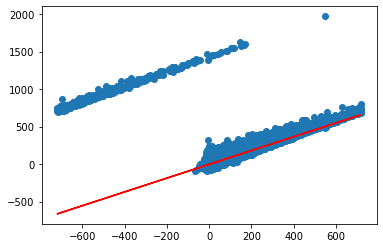

In [16]:
from matplotlib import pyplot as plt
plt.scatter(train_d.DEPARTURE_DELAY, train_d.ARRIVAL_DELAY)
plt.plot(xfit0, yfit0, c='r')

In [17]:
pd.DataFrame(yfit0, columns=['ARRIVAL_DELAY'])

,ARRIVAL_DELAY
0,31.680510
1,-7.835190
2,-7.835190
3,40.870207
4,5.030387
...,...
514379,-5.997250
514380,8.706266
514381,-6.916220
514382,1.354508


In [18]:
pd.DataFrame(yfit0, columns=['ARRIVAL_DELAY']).to_csv('submit_sample1.csv', index_label='id')

In [19]:
X = train_dep["DEPARTURE_DELAY"].values
Y = train_dep["ARRIVAL_DELAY"].values

model.fit(X[:, np.newaxis], Y)

xfit1 = test_d['DEPARTURE_DELAY'].values

yfit1 = model.predict(xfit1[:, np.newaxis])
yfit1

array([27.95520224, -9.1921433 , -9.1921433 , ..., -8.32825155,
       -0.55322573, -6.60046803])

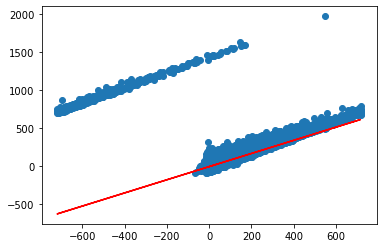

In [20]:
from matplotlib import pyplot as plt
plt.scatter(train_d.DEPARTURE_DELAY, train_d.ARRIVAL_DELAY)
plt.plot(xfit1, yfit1, c='r')

In [21]:
pd.DataFrame(yfit1, columns=['ARRIVAL_DELAY']).to_csv('submit_sample2.csv', index_label='id')

In [22]:
train[train.ARRIVAL_DELAY>1350]

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
34456,34456,2015,1,3,6,AA,1677,N557AA,MEM,DFW,1010,910.0,21.0,931.0,100.0,432,1150,1384.0
150600,150600,2015,1,11,7,AA,1595,N469AA,AUS,DFW,650,700.0,14.0,714.0,65.0,190,755,1444.0
182695,182695,2015,1,13,2,AA,1487,N479AA,OMA,DFW,841,800.0,21.0,821.0,124.0,583,1045,1392.0
258405,258405,2015,1,18,7,AA,224,N5DGAA,LAS,LAX,1130,1414.0,16.0,1430.0,76.0,236,1246,1593.0
305007,305007,2015,1,21,3,AA,2385,N4XNAA,JAX,DFW,1223,1240.0,14.0,1254.0,172.0,918,1415,1452.0
331026,331026,2015,1,23,5,AA,1322,N598AA,BHM,DFW,700,1608.0,13.0,1621.0,134.0,597,914,1971.0
347728,347728,2015,1,24,6,AA,1301,N470AA,MSP,DFW,821,708.0,31.0,739.0,164.0,852,1105,1353.0
387354,387354,2015,1,27,2,AA,1242,N586AA,FAT,DFW,659,850.0,19.0,909.0,191.0,1313,1210,1546.0
502357,502357,2015,2,4,3,AA,2293,N5ELAA,SFO,DFW,1159,1044.0,15.0,1059.0,201.0,1464,1720,1371.0
564461,564461,2015,2,8,7,HA,50,N374HA,HNL,JFK,1630,1623.0,18.0,1641.0,565.0,4983,655,1391.0


In [23]:
train.ARRIVAL_DELAY.sort_values()

1420147     -87.0
1049837     -87.0
309817      -82.0
1783910     -81.0
542188      -79.0
            ...  
911947     1576.0
258405     1593.0
1232474    1598.0
853639     1627.0
331026     1971.0
Name: ARRIVAL_DELAY, Length: 2818553, dtype: float64

In [24]:
def dep_delay(dataset):
    dep = (dataset.DEPARTURE_TIME-dataset.DEPARTURE_TIME%100)*60/100 + dataset.DEPARTURE_TIME%100
    sch = (dataset.SCHEDULED_DEPARTURE-dataset.SCHEDULED_DEPARTURE%100)*60/100 + dataset.SCHEDULED_DEPARTURE%100

    # the difference 
    dif = pd.DataFrame(dep - sch)
    
    dif[abs(dif) > 720] = np.sign(dif[abs(dif) > 720])*(abs(dif[abs(dif) > 720]) - 1440)
    dif[dif < -90] = dif[dif < -90] + 1440
    diff = dif.rename({0: 'DEPARTURE_DELAY'}, axis = 1)
    train_dep = dataset.join(diff)
    return train_dep

train_delay = dep_delay(train)
train_delay

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DEPARTURE_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,-11.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,-8.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,-2.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,-5.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,2818548,2015,6,30,2,UA,1180,N65832,LAX,ORD,2359,2358.0,11.0,9.0,241.0,1744,600,-8.0,-1.0
2818549,2818549,2015,6,30,2,UA,1192,N69839,LAX,IAH,2359,129.0,11.0,140.0,201.0,1379,520,79.0,90.0
2818550,2818550,2015,6,30,2,UA,1480,N37298,PDX,IAH,2359,152.0,8.0,200.0,249.0,1825,608,107.0,113.0
2818551,2818551,2015,6,30,2,UA,1637,N35260,SEA,IAH,2359,12.0,12.0,24.0,250.0,1874,609,9.0,13.0


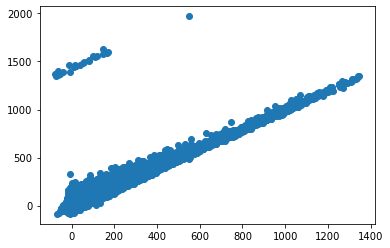

In [25]:
plt.scatter(train_delay.DEPARTURE_DELAY, train_delay.ARRIVAL_DELAY)

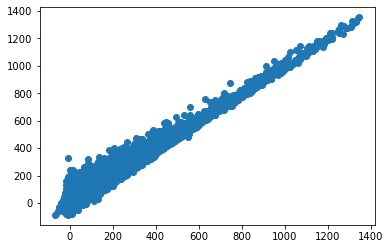

In [26]:
traindelay = train_delay[400 + train_delay.DEPARTURE_DELAY > train_delay.ARRIVAL_DELAY]
plt.scatter(traindelay.DEPARTURE_DELAY, traindelay.ARRIVAL_DELAY)

In [27]:
test_del = dep_delay(test)
test_del

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DEPARTURE_DELAY
0,0,2015,7,1,3,NK,298,N624NK,LAS,IAH,3,41.0,11.0,52.0,177.0,1222,500,38.0
1,1,2015,7,1,3,AA,1965,N507AY,SFO,CLT,5,2400.0,21.0,21.0,303.0,2296,808,-5.0
2,2,2015,7,1,3,DL,2020,N3759,LAX,MEM,5,2400.0,36.0,36.0,223.0,1619,548,-5.0
3,3,2015,7,1,3,NK,612,N629NK,LAS,MSP,5,53.0,14.0,107.0,178.0,1299,503,48.0
4,4,2015,7,1,3,UA,1044,N39418,ANC,ORD,8,17.0,20.0,37.0,364.0,2846,912,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514379,514379,2015,7,31,5,DL,919,N835DN,PDX,DTW,2359,2356.0,12.0,8.0,248.0,1953,707,-3.0
514380,514380,2015,7,31,5,DL,1846,N372DA,PDX,ATL,2359,12.0,10.0,22.0,274.0,2172,733,13.0
514381,514381,2015,7,31,5,F9,682,N922FR,DEN,MCO,2359,2355.0,14.0,9.0,213.0,1546,532,-4.0
514382,514382,2015,7,31,5,F9,300,N951FR,DEN,TPA,2359,4.0,16.0,20.0,204.0,1506,523,5.0


In [28]:
X = traindelay["DEPARTURE_DELAY"].values
Y = traindelay["ARRIVAL_DELAY"].values

model.fit(X[:, np.newaxis], Y)

xfit2 = test_del['DEPARTURE_DELAY'].values

yfit2 = model.predict(xfit2[:, np.newaxis])
yfit2

array([33.92804172, -9.41850665, -9.41850665, ..., -8.41044739,
        0.66208599, -6.39432886])

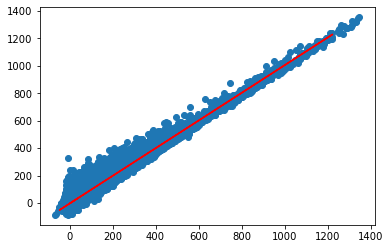

In [29]:
from matplotlib import pyplot as plt
plt.scatter(traindelay.DEPARTURE_DELAY, traindelay.ARRIVAL_DELAY)
plt.plot(xfit2, yfit2, c='r')

In [30]:
pd.DataFrame(yfit2, columns=['ARRIVAL_DELAY']).to_csv('submit_sample3.csv', index_label='id')

In [31]:
test_d.DEPARTURE_DELAY.sort_values()

112784   -719.0
281955   -705.0
196836   -703.0
63874    -700.0
65733    -696.0
          ...  
250403    704.0
254574    706.0
114320    706.0
513632    714.0
344705    716.0
Name: DEPARTURE_DELAY, Length: 514384, dtype: float64

In [32]:
test_del.DEPARTURE_DELAY.sort_values()

282680     -47.0
244146     -41.0
60493      -40.0
328349     -39.0
363954     -37.0
           ...  
68566     1075.0
272476    1125.0
119316    1170.0
136518    1176.0
453217    1223.0
Name: DEPARTURE_DELAY, Length: 514384, dtype: float64

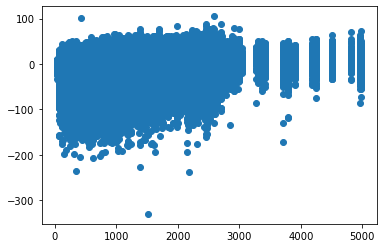

In [33]:
plt.scatter(traindelay.DISTANCE, traindelay.DEPARTURE_DELAY - traindelay.ARRIVAL_DELAY)

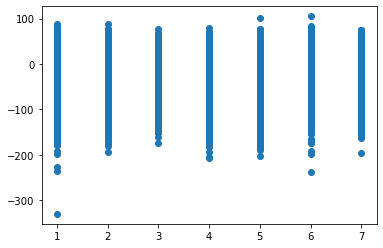

In [191]:
plt.scatter(traindelay.DAY_OF_WEEK, traindelay.DEPARTURE_DELAY - traindelay.ARRIVAL_DELAY)

In [34]:
traindelay.TAXI_OUT.sort_values()

729898       1.0
2465625      1.0
1872991      1.0
870439       1.0
2638813      1.0
           ...  
872388     180.0
846085     181.0
845346     185.0
2228244    200.0
846223     225.0
Name: TAXI_OUT, Length: 2818524, dtype: float64

In [71]:
def dep_whoff(dataset):
    dep = (dataset.WHEELS_OFF-dataset.WHEELS_OFF%100)*60/100 + dataset.WHEELS_OFF%100
    sch = (dataset.SCHEDULED_DEPARTURE-dataset.SCHEDULED_DEPARTURE%100)*60/100 + dataset.SCHEDULED_DEPARTURE%100

    # the difference 
    dif = pd.DataFrame(dep - sch)
    
    dif[abs(dif) > 720] = np.sign(dif[abs(dif) > 720])*(abs(dif[abs(dif) > 720]) - 1440)
    dif[dif < -90] = dif[dif < -90] + 1440
    diff = dif.rename({0: 'DEPARTURE_DELAY'}, axis = 1)
    train_dep = dataset.join(diff)
    return train_dep

train_whoff = dep_whoff(train)
train_whoff

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DEPARTURE_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,10.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,4.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,14.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,10.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,2818548,2015,6,30,2,UA,1180,N65832,LAX,ORD,2359,2358.0,11.0,9.0,241.0,1744,600,-8.0,10.0
2818549,2818549,2015,6,30,2,UA,1192,N69839,LAX,IAH,2359,129.0,11.0,140.0,201.0,1379,520,79.0,101.0
2818550,2818550,2015,6,30,2,UA,1480,N37298,PDX,IAH,2359,152.0,8.0,200.0,249.0,1825,608,107.0,121.0
2818551,2818551,2015,6,30,2,UA,1637,N35260,SEA,IAH,2359,12.0,12.0,24.0,250.0,1874,609,9.0,25.0


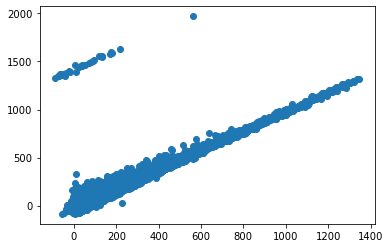

In [36]:
plt.scatter(train_whoff.DEPARTURE_DELAY, train_whoff.ARRIVAL_DELAY)

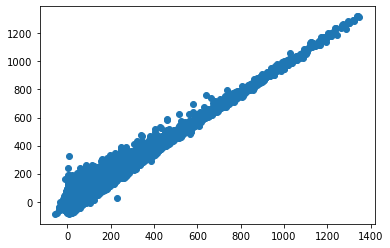

In [72]:
trainwhoff = train_whoff[400 + train_whoff.DEPARTURE_DELAY > train_whoff.ARRIVAL_DELAY]
plt.scatter(trainwhoff.DEPARTURE_DELAY, trainwhoff.ARRIVAL_DELAY)

In [38]:
test_w = dep_whoff(test)
test_w

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DEPARTURE_DELAY
0,0,2015,7,1,3,NK,298,N624NK,LAS,IAH,3,41.0,11.0,52.0,177.0,1222,500,49.0
1,1,2015,7,1,3,AA,1965,N507AY,SFO,CLT,5,2400.0,21.0,21.0,303.0,2296,808,16.0
2,2,2015,7,1,3,DL,2020,N3759,LAX,MEM,5,2400.0,36.0,36.0,223.0,1619,548,31.0
3,3,2015,7,1,3,NK,612,N629NK,LAS,MSP,5,53.0,14.0,107.0,178.0,1299,503,62.0
4,4,2015,7,1,3,UA,1044,N39418,ANC,ORD,8,17.0,20.0,37.0,364.0,2846,912,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514379,514379,2015,7,31,5,DL,919,N835DN,PDX,DTW,2359,2356.0,12.0,8.0,248.0,1953,707,9.0
514380,514380,2015,7,31,5,DL,1846,N372DA,PDX,ATL,2359,12.0,10.0,22.0,274.0,2172,733,23.0
514381,514381,2015,7,31,5,F9,682,N922FR,DEN,MCO,2359,2355.0,14.0,9.0,213.0,1546,532,10.0
514382,514382,2015,7,31,5,F9,300,N951FR,DEN,TPA,2359,4.0,16.0,20.0,204.0,1506,523,21.0


In [49]:
X = trainwhoff["DEPARTURE_DELAY"].values
Y = trainwhoff["ARRIVAL_DELAY"].values

model.fit(X[:, np.newaxis], Y)

xfit3 = test_w['DEPARTURE_DELAY'].values

yfit3 = model.predict(xfit3[:, np.newaxis])
yfit3

array([ 28.12780661,  -4.2217388 ,  10.48260002, ..., -10.10347434,
         0.67970747,  -1.28087104])

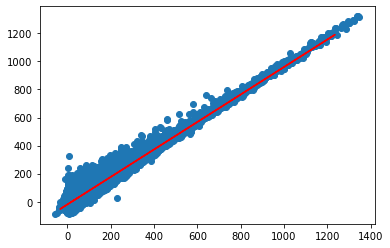

In [50]:
plt.scatter(trainwhoff.DEPARTURE_DELAY, trainwhoff.ARRIVAL_DELAY)
plt.plot(xfit3, yfit3, c='r')

In [41]:
pd.DataFrame(yfit3, columns=['ARRIVAL_DELAY']).to_csv('submit_sample4.csv', index_label='id')

In [51]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = trainwhoff["DEPARTURE_DELAY"].values
Y = trainwhoff["ARRIVAL_DELAY"].values

regr = make_pipeline(StandardScaler(), LinearSVR(random_state=0, tol=1e-5))
regr.fit(X[:, np.newaxis], Y)

xfit4 = test_w['DEPARTURE_DELAY'].values

yfit4 = regr.predict(xfit4[:, np.newaxis])
yfit4

array([28.12616112, -4.07281991, 10.56308056, ..., -9.92718009,
        0.80581358, -1.14563981])

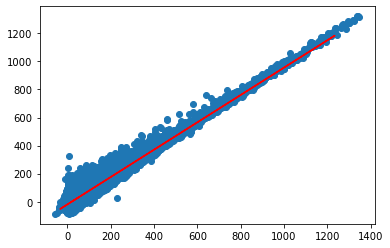

In [52]:
plt.scatter(trainwhoff.DEPARTURE_DELAY, trainwhoff.ARRIVAL_DELAY)
plt.plot(xfit4, yfit4, c='r')

In [53]:
pd.DataFrame(yfit4, columns=['ARRIVAL_DELAY']).to_csv('submit_sample5.csv', index_label='id')

In [73]:
#trainwhoff['DATE'] = pd.to_datetime(trainwhoff[['YEAR','MONTH', 'DAY']])
trainwhoff

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DEPARTURE_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,10.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,4.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,14.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,10.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,2818548,2015,6,30,2,UA,1180,N65832,LAX,ORD,2359,2358.0,11.0,9.0,241.0,1744,600,-8.0,10.0
2818549,2818549,2015,6,30,2,UA,1192,N69839,LAX,IAH,2359,129.0,11.0,140.0,201.0,1379,520,79.0,101.0
2818550,2818550,2015,6,30,2,UA,1480,N37298,PDX,IAH,2359,152.0,8.0,200.0,249.0,1825,608,107.0,121.0
2818551,2818551,2015,6,30,2,UA,1637,N35260,SEA,IAH,2359,12.0,12.0,24.0,250.0,1874,609,9.0,25.0


In [110]:
X = trainwhoff[['DEPARTURE_DELAY','DISTANCE']].values
Y = trainwhoff["ARRIVAL_DELAY"].values

model.fit(X, Y)

xfit5 = test_w[['DEPARTURE_DELAY','DISTANCE']].values

yfit5 = model.predict(xfit5)
yfit5

array([ 26.56695854, -10.15328381,   7.2931123 , ..., -13.04807932,
        -2.0801739 ,  -3.35714875])

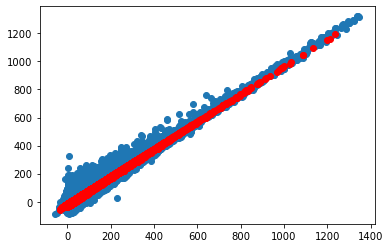

In [135]:
plt.scatter(trainwhoff.DEPARTURE_DELAY, trainwhoff.ARRIVAL_DELAY)
plt.scatter(test_w['DEPARTURE_DELAY'], yfit5, c='r')

In [115]:
pd.DataFrame(yfit5, columns=['ARRIVAL_DELAY']).to_csv('submit_sample6.csv', index_label='id')

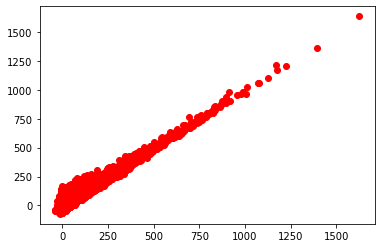

In [124]:
plt.scatter(results.DEPARTURE_DELAY, results.ARRIVAL_DELAY, c='r')
plt.scatter(trainwhoff.DEPARTURE_DELAY, trainwhoff.ARRIVAL_DELAY)

In [173]:
X = trainwhoff[['DEPARTURE_DELAY','DISTANCE', 'DAY_OF_WEEK']].values
Y = trainwhoff["ARRIVAL_DELAY"].values

model.fit(X, Y)

xfit6 = test_w[['DEPARTURE_DELAY','DISTANCE', 'DAY_OF_WEEK']].values

yfit6 = model.predict(xfit6)
yfit6

array([ 26.57185489, -10.14790197,   7.29821747, ..., -13.05330847,
        -2.08547058,  -3.36248632])

In [179]:
pd.DataFrame(yfit6, columns=['ARRIVAL_DELAY']).to_csv('submit_sample7.csv', index_label='id')

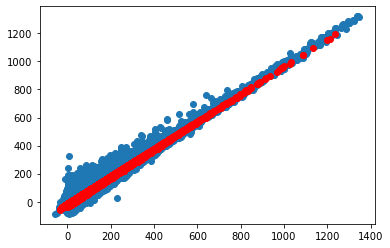

In [175]:
plt.scatter(trainwhoff.DEPARTURE_DELAY, trainwhoff.ARRIVAL_DELAY)
plt.scatter(test_w['DEPARTURE_DELAY'], yfit6, c='r')

In [227]:
trainwhoff
trainwhoff['PATH'] = trainwhoff.ORIGIN_AIRPORT + ' - ' + trainwhoff.DESTINATION_AIRPORT
train_airline = trainwhoff.sort_values(by = ['AIRLINE', 'PATH']).set_index(['AIRLINE','PATH'])
train_airline

<ipython-input-227-7e53f8f8d94b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainwhoff['PATH'] = trainwhoff.ORIGIN_AIRPORT + ' - ' + trainwhoff.DESTINATION_AIRPORT


id  YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
AIRLINE PATH                                                               
AA      ABQ - DFW     1114  2015      1    1            4           1184   
        ABQ - DFW     2294  2015      1    1            4            336   
        ABQ - DFW     8117  2015      1    1            4           1024   
        ABQ - DFW    15587  2015      1    2            5           1184   
        ABQ - DFW    17232  2015      1    2            5            336   
...                    ...   ...    ...  ...          ...            ...   
WN      TUS - SAN  2793015  2015      6   29            1           4393   
        TUS - SAN  2801335  2015      6   29            1            306   
        TUS - SAN  2806979  2015      6   30            2           1383   
        TUS - SAN  2809821  2015      6   30            2           4393   
        TUS - SAN  2817751  2015      6   30            2            306   

                  TAIL_NUMBER ORIGIN_AIRPORT DESTINATION_AIRPORT  \
AIRLINE PATH                                                       
AA      ABQ - DFW      N4YMAA            ABQ                 DFW   
        ABQ - DFW      N479AA            ABQ                 DFW   
        ABQ - DFW      N505AA            ABQ                 DFW   
        ABQ - DFW      N4XPAA            ABQ                 DFW   
        ABQ - DFW      N486AA            ABQ                 DFW   
...                       ...            ...                 ...   
WN      TUS - SAN      N628SW            TUS                 SAN   
        TUS - SAN      N687SW            TUS                 SAN   
        TUS - SAN      N616SW            TUS                 SAN   
        TUS - SAN      N625SW            TUS                 SAN   
        TUS - SAN      N616SW            TUS                 SAN   

                   SCHEDULED_DEPARTURE  DEPARTURE_TIME  TAXI_OUT  WHEELS_OFF  \
AIRLINE PATH                                                                   
AA      ABQ - DFW                  725           739.0      31.0       810.0   
        ABQ - DFW                  900           858.0      45.0       943.0   
        ABQ - DFW                 1530          1544.0      10.0      1554.0   
        ABQ - DFW                  725           725.0      34.0       759.0   
        ABQ - DFW                  900           859.0      28.0       927.0   
...                                ...             ...       ...         ...   
WN      TUS - SAN                 1240          1251.0      19.0      1310.0   
        TUS - SAN                 2120          2132.0       9.0      2141.0   
        TUS - SAN                  950           945.0       7.0       952.0   
        TUS - SAN                 1240          1251.0       8.0      1259.0   
        TUS - SAN                 2120          2117.0       6.0      2123.0   

                   SCHEDULED_TIME  DISTANCE  SCHEDULED_ARRIVAL  ARRIVAL_DELAY  \
AIRLINE PATH                                                                    
AA      ABQ - DFW           110.0       569               1015           17.0   
        ABQ - DFW           105.0       569               1145           36.0   
        ABQ - DFW           100.0       569               1810           13.0   
        ABQ - DFW           110.0       569               1015           18.0   
        ABQ - DFW           105.0       569               1145           17.0   
...                           ...       ...                ...            ...   
WN      TUS - SAN            70.0       368               1350           16.0   
        TUS - SAN            70.0       368               2230            7.0   
        TUS - SAN            75.0       368               1105           -3.0   
        TUS - SAN            70.0       368               1350            8.0   
        TUS - SAN            70.0       368               2230           -9.0   

                   DEPARTURE_DELAY  
AIRLINE PATH      

In [282]:
train_airline.loc['AA', 'ABQ - DFW'].mean().ARRIVAL_DELAY

10.65614798694233

In [172]:
airline = airlines.IATA_CODE.sort_values().values

array(['AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'MQ', 'NK', 'OO', 'UA',
       'US', 'VX', 'WN'], dtype=object)

In [257]:
test_w['PATH'] = test_w.ORIGIN_AIRPORT + ' - ' + test_w.DESTINATION_AIRPORT
test_airline = test_w.sort_values(by = ['AIRLINE', 'PATH']).set_index(['AIRLINE','PATH'])
test_airline

id  YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
AIRLINE PATH                                                              
AA      ABQ - CLT      27  2015      7    1            3           1877   
        ABQ - CLT   16727  2015      7    2            4           1877   
        ABQ - CLT   34003  2015      7    3            5           1877   
        ABQ - CLT   48554  2015      7    4            6           2042   
        ABQ - CLT   61131  2015      7    5            7            899   
...                   ...   ...    ...  ...          ...            ...   
WN      TUS - SAN  487966  2015      7   30            4           4393   
        TUS - SAN  496245  2015      7   30            4            306   
        TUS - SAN  502111  2015      7   31            5           1383   
        TUS - SAN  505040  2015      7   31            5           4393   
        TUS - SAN  513419  2015      7   31            5            306   

                  TAIL_NUMBER ORIGIN_AIRPORT DESTINATION_AIRPORT  \
AIRLINE PATH                                                       
AA      ABQ - CLT      N805AW            ABQ                 CLT   
        ABQ - CLT      N801AW            ABQ                 CLT   
        ABQ - CLT      N750UW            ABQ                 CLT   
        ABQ - CLT      N762US            ABQ                 CLT   
        ABQ - CLT      N721UW            ABQ                 CLT   
...                       ...            ...                 ...   
WN      TUS - SAN      N616SW            TUS                 SAN   
        TUS - SAN      N659SW            TUS                 SAN   
        TUS - SAN      N645SW            TUS                 SAN   
        TUS - SAN      N644SW            TUS                 SAN   
        TUS - SAN      N397SW            TUS                 SAN   

                   SCHEDULED_DEPARTURE  DEPARTURE_TIME  TAXI_OUT  WHEELS_OFF  \
AIRLINE PATH                                                                   
AA      ABQ - CLT                   40            47.0      13.0       100.0   
        ABQ - CLT                   40            37.0      11.0        48.0   
        ABQ - CLT                   40            42.0      12.0        54.0   
        ABQ - CLT                   40           122.0       9.0       131.0   
        ABQ - CLT                   40            37.0       9.0        46.0   
...                                ...             ...       ...         ...   
WN      TUS - SAN                 1240          1243.0       8.0      1251.0   
        TUS - SAN                 2120          2159.0       9.0      2208.0   
        TUS - SAN                  950           940.0      12.0       952.0   
        TUS - SAN                 1240          1248.0       8.0      1256.0   
        TUS - SAN                 2120          2117.0       8.0      2125.0   

                   SCHEDULED_TIME  DISTANCE  SCHEDULED_ARRIVAL  \
AIRLINE PATH                                                     
AA      ABQ - CLT           205.0      1449                605   
        ABQ - CLT           205.0      1449                605   
        ABQ - CLT           205.0      1449                605   
        ABQ - CLT           205.0      1449                605   
        ABQ - CLT           205.0      1449                605   
...                           ...       ...                ...   
WN      TUS - SAN            70.0       368               1350   
        TUS - SAN            70.0       368               2230   
        TUS - SAN            75.0       368               1105   
        TUS - SAN            70.0       368               1350   
        TUS - SAN            70.0       368               2230   

                   DEPARTURE_DELAY  
AIRLINE PATH                        
AA      ABQ - CLT             20.0  
        ABQ - CLT              8.0  
        ABQ - CLT             14.0  
        ABQ - CLT             51.0  
        ABQ - CLT              6.0  
...

In [275]:
b = list(dict.fromkeys(list(train_airline.index)))
len(b)

7670

In [276]:
c = list(dict.fromkeys(list(test_airline.index)))
len(c)

6305

In [274]:
for a in b:
    if a not in c:
        print(a)

('AA', 'BHM - DFW')
('AA', 'BNA - MIA')
('AA', 'DFW - BHM')
('AA', 'DFW - GUC')
('AA', 'DFW - HDN')
('AA', 'DFW - HOU')
('AA', 'DFW - ICT')
('AA', 'DFW - LIT')
('AA', 'DFW - MTJ')
('AA', 'DFW - XNA')
('AA', 'EGE - JFK')
('AA', 'EGE - LAX')
('AA', 'EGE - MIA')
('AA', 'EGE - ORD')
('AA', 'GUC - DFW')
('AA', 'HDN - DFW')
('AA', 'HOU - DFW')
('AA', 'ICT - DFW')
('AA', 'JFK - EGE')
('AA', 'LAX - EGE')
('AA', 'LAX - PBI')
('AA', 'LAX - PDX')
('AA', 'LGA - PBI')
('AA', 'LIT - DFW')
('AA', 'MIA - BNA')
('AA', 'MIA - EGE')
('AA', 'MSY - ORD')
('AA', 'MTJ - DFW')
('AA', 'ORD - EGE')
('AA', 'ORD - MSY')
('AA', 'ORD - PSP')
('AA', 'ORD - SAT')
('AA', 'ORD - XNA')
('AA', 'PBI - LAX')
('AA', 'PBI - LGA')
('AA', 'PDX - LAX')
('AA', 'PSP - ORD')
('AA', 'SAT - ORD')
('AA', 'XNA - DFW')
('AA', 'XNA - ORD')
('AS', 'ANC - KOA')
('AS', 'ANC - LAS')
('AS', 'ANC - OGG')
('AS', 'ANC - PHX')
('AS', 'BLI - HNL')
('AS', 'BLI - LAS')
('AS', 'BLI - OGG')
('AS', 'BLI - SEA')
('AS', 'HNL - BLI')
('AS', 'KOA - ANC')


('EV', 'MSP - MBS')
('EV', 'MSP - MCI')
('EV', 'MSP - MDW')
('EV', 'MSP - MEM')
('EV', 'MSP - MKE')
('EV', 'MSP - MLI')
('EV', 'MSP - MSN')
('EV', 'MSP - MSY')
('EV', 'MSP - ORD')
('EV', 'MSP - PHL')
('EV', 'MSP - RDU')
('EV', 'MSP - ROC')
('EV', 'MSP - SBN')
('EV', 'MSP - SDF')
('EV', 'MSP - STL')
('EV', 'MSP - SYR')
('EV', 'MSP - XNA')
('EV', 'MSY - DEN')
('EV', 'MSY - DTW')
('EV', 'MSY - LGA')
('EV', 'MSY - MSP')
('EV', 'MTJ - DEN')
('EV', 'OKC - DEN')
('EV', 'OKC - DFW')
('EV', 'OKC - IAD')
('EV', 'OMA - DCA')
('EV', 'OMA - DEN')
('EV', 'ORD - EWR')
('EV', 'ORD - PHL')
('EV', 'ORF - ATL')
('EV', 'ORF - IAD')
('EV', 'ORF - LGA')
('EV', 'PHL - DTW')
('EV', 'PHL - IAH')
('EV', 'PHL - MSP')
('EV', 'PHL - ORD')
('EV', 'PHX - DEN')
('EV', 'PIT - ATL')
('EV', 'PIT - CVG')
('EV', 'PIT - DEN')
('EV', 'PIT - IAD')
('EV', 'PIT - IAH')
('EV', 'PNS - ATL')
('EV', 'PVD - ATL')
('EV', 'PVD - DTW')
('EV', 'PVD - IAD')
('EV', 'RAP - ATL')
('EV', 'RAP - DEN')
('EV', 'RAP - DFW')
('EV', 'RDU - BOS')


('OO', 'LAX - MCI')
('OO', 'LAX - MTJ')
('OO', 'LAX - PDX')
('OO', 'LAX - SMX')
('OO', 'LGA - ORD')
('OO', 'LGB - SEA')
('OO', 'MBS - MSP')
('OO', 'MCI - CVG')
('OO', 'MCI - DLH')
('OO', 'MCI - DTW')
('OO', 'MCI - LAX')
('OO', 'MCI - MSP')
('OO', 'MCI - PHX')
('OO', 'MCI - SLC')
('OO', 'MDT - DTW')
('OO', 'MEM - DTW')
('OO', 'MEM - MSP')
('OO', 'MEM - SLC')
('OO', 'MLI - MSP')
('OO', 'MMH - DEN')
('OO', 'MMH - SFO')
('OO', 'MSN - CID')
('OO', 'MSN - CVG')
('OO', 'MSO - MSP')
('OO', 'MSP - ASE')
('OO', 'MSP - AUS')
('OO', 'MSP - AZO')
('OO', 'MSP - BDL')
('OO', 'MSP - BIL')
('OO', 'MSP - BMI')
('OO', 'MSP - BOI')
('OO', 'MSP - BZN')
('OO', 'MSP - CLE')
('OO', 'MSP - CWA')
('OO', 'MSP - EWR')
('OO', 'MSP - FCA')
('OO', 'MSP - GEG')
('OO', 'MSP - IAD')
('OO', 'MSP - IND')
('OO', 'MSP - MBS')
('OO', 'MSP - MCI')
('OO', 'MSP - MEM')
('OO', 'MSP - MLI')
('OO', 'MSP - MSO')
('OO', 'MSP - PHL')
('OO', 'MSP - PIA')
('OO', 'MSP - PIT')
('OO', 'MSP - RST')
('OO', 'MSP - SDF')
('OO', 'MSP - STL')


('US', 'PHX - ANC')
('US', 'PHX - ATL')
('US', 'PHX - AUS')
('US', 'PHX - BOI')
('US', 'PHX - BOS')
('US', 'PHX - BWI')
('US', 'PHX - CLE')
('US', 'PHX - CLT')
('US', 'PHX - CMH')
('US', 'PHX - DCA')
('US', 'PHX - DEN')
('US', 'PHX - DFW')
('US', 'PHX - DSM')
('US', 'PHX - DTW')
('US', 'PHX - EWR')
('US', 'PHX - FLL')
('US', 'PHX - GEG')
('US', 'PHX - HNL')
('US', 'PHX - IAH')
('US', 'PHX - IND')
('US', 'PHX - JFK')
('US', 'PHX - KOA')
('US', 'PHX - LAS')
('US', 'PHX - LAX')
('US', 'PHX - LIH')
('US', 'PHX - MCI')
('US', 'PHX - MCO')
('US', 'PHX - MKE')
('US', 'PHX - MSP')
('US', 'PHX - MSY')
('US', 'PHX - OAK')
('US', 'PHX - OGG')
('US', 'PHX - OMA')
('US', 'PHX - ONT')
('US', 'PHX - ORD')
('US', 'PHX - PDX')
('US', 'PHX - PHL')
('US', 'PHX - PIT')
('US', 'PHX - RNO')
('US', 'PHX - SAN')
('US', 'PHX - SEA')
('US', 'PHX - SFO')
('US', 'PHX - SJC')
('US', 'PHX - SLC')
('US', 'PHX - SMF')
('US', 'PHX - SNA')
('US', 'PHX - STL')
('US', 'PHX - TPA')
('US', 'PHX - TUS')
('US', 'PIT - CLT')


In [ ]:
for l in airline:
    for p in list(dict.fromkeys(list(train_airline.loc[l].index))):
        X = train_airline.loc[l, p][['DEPARTURE_DELAY','DISTANCE']].values
        Y = train_airline.loc[l, p]["ARRIVAL_DELAY"].values

        model.fit(X, Y)

        xfit7 = test_w[['DEPARTURE_DELAY','DISTANCE']].values

        yfit7 = model.predict(xfit7)
        yfit7